## First Week:
1. Use 3 million trimmed sample and connect it to weather dataset. 

In [1]:
import pandas as pd
df = pd.read_csv('TripsRandomSample.csv')

In [2]:
df.shape

(3000000, 23)

In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Trip ID'], axis = 1)

In [4]:
df.columns

Index(['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location'],
      dtype='object')

In [5]:
df.to_csv('dropped.csv')

In [6]:
from datetime import datetime
import pytz
from dateutil import parser

chicago_timezone = pytz.timezone('America/Chicago')

for i in ['Start', 'End']:
  df[f'Trip {i} UTC'] = df[f'Trip {i} Timestamp'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
  df[f'Trip {i} UTC'] = df[f'Trip {i} UTC'].apply(lambda x: pytz.utc.localize(x))
  df[f'Trip {i} Chicago'] = df[f'Trip {i} UTC'].apply(lambda x: x.astimezone(chicago_timezone))

In [24]:
df['Date'] = df['Trip Start Chicago'].apply(lambda x: str(x)[:10])
df['Hour'] = df['Trip Start Chicago'].apply(lambda x: str(x)[11:13])

In [29]:
df['time'] = df['Trip Start Chicago'].apply(lambda x: str(x)[:10] + 'T' + str(x)[11:13] + ':00')

In [30]:
df

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start UTC,Trip Start Chicago,Trip End UTC,Trip End Chicago,Date,Hour,time
0,03/24/2019 10:30:00 AM,03/24/2019 10:45:00 AM,790.0,5.6,NaN,NaN,48.0,53.0,10.0,0.0,...,41.673820,-87.635740,POINT (-87.6357397768 41.6738199043),2019-03-24 10:30:00+00:00,2019-03-24 05:30:00-05:00,2019-03-24 10:45:00+00:00,2019-03-24 05:45:00-05:00,2019-03-24,05,2019-03-24T05:00
1,03/12/2019 10:15:00 AM,03/12/2019 10:30:00 AM,568.0,1.4,1.703128e+10,1.703108e+10,28.0,8.0,5.0,2.0,...,41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),2019-03-12 10:15:00+00:00,2019-03-12 05:15:00-05:00,2019-03-12 10:30:00+00:00,2019-03-12 05:30:00-05:00,2019-03-12,05,2019-03-12T05:00
2,03/19/2019 08:15:00 AM,03/19/2019 08:30:00 AM,593.0,2.5,1.703148e+10,1.703184e+10,48.0,44.0,7.5,0.0,...,41.742488,-87.630045,POINT (-87.6300448953 41.7424875717),2019-03-19 08:15:00+00:00,2019-03-19 03:15:00-05:00,2019-03-19 08:30:00+00:00,2019-03-19 03:30:00-05:00,2019-03-19,03,2019-03-19T03:00
3,03/21/2019 05:45:00 PM,03/21/2019 06:00:00 PM,1398.0,2.4,1.703183e+10,1.703108e+10,28.0,8.0,5.0,0.0,...,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2019-03-21 17:45:00+00:00,2019-03-21 12:45:00-05:00,2019-03-21 18:00:00+00:00,2019-03-21 13:00:00-05:00,2019-03-21,12,2019-03-21T12:00
4,02/01/2019 08:45:00 PM,02/01/2019 09:00:00 PM,706.0,2.7,1.703108e+10,1.703106e+10,8.0,6.0,7.5,1.0,...,41.934659,-87.646730,POINT (-87.6467297286 41.9346591566),2019-02-01 20:45:00+00:00,2019-02-01 14:45:00-06:00,2019-02-01 21:00:00+00:00,2019-02-01 15:00:00-06:00,2019-02-01,14,2019-02-01T14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,01/26/2019 01:45:00 AM,01/26/2019 01:45:00 AM,215.0,1.0,1.703108e+10,1.703183e+10,8.0,7.0,2.5,0.0,...,41.914747,-87.654007,POINT (-87.6540070286 41.9147473049),2019-01-26 01:45:00+00:00,2019-01-25 19:45:00-06:00,2019-01-26 01:45:00+00:00,2019-01-25 19:45:00-06:00,2019-01-25,19,2019-01-25T19:00
2999996,03/01/2019 07:45:00 PM,03/01/2019 08:00:00 PM,376.0,1.3,1.703107e+10,1.703107e+10,7.0,7.0,5.0,0.0,...,41.914616,-87.631717,POINT (-87.6317173661 41.9146162864),2019-03-01 19:45:00+00:00,2019-03-01 13:45:00-06:00,2019-03-01 20:00:00+00:00,2019-03-01 14:00:00-06:00,2019-03-01,13,2019-03-01T13:00
2999997,03/04/2019 04:45:00 AM,03/04/2019 05:15:00 AM,1382.0,15.6,1.703106e+10,1.703198e+10,6.0,76.0,20.0,0.0,...,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2019-03-04 04:45:00+00:00,2019-03-03 22:45:00-06:00,2019-03-04 05:15:00+00:00,2019-03-03 23:15:00-06:00,2019-03-03,22,2019-03-03T22:00
2999998,01/07/2019 09:00:00 AM,01/07/2019 09:30:00 AM,2138.0,7.4,1.703138e+10,1.703184e+10,38.0,32.0,12.5,0.0,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-01-07 09:00:00+00:00,2019-01-07 03:00:00-06:00,2019-01-07 09:30:00+00:00,2019-01-07 03:30:00-06:00,2019-01-07,03,2019-01-07T03:00


In [13]:
print(min(df['Date']))
print(max(df['Date']))

2018-10-31
2022-12-31


In [18]:
weather = pd.read_csv('archive.csv', skiprows=3)

In [19]:
weather

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
0,2018-10-31T00:00,12.9,96,2.2,2.2,0.0,100,13.8,354
1,2018-10-31T01:00,11.3,94,0.8,0.8,0.0,100,15.8,1
2,2018-10-31T02:00,11.2,93,1.5,1.5,0.0,100,19.6,354
3,2018-10-31T03:00,10.8,91,3.2,3.2,0.0,100,20.9,345
4,2018-10-31T04:00,10.4,89,1.1,1.1,0.0,100,14.6,351
...,...,...,...,...,...,...,...,...,...
36547,2022-12-31T19:00,0.6,91,0.0,0.0,0.0,80,9.9,134
36548,2022-12-31T20:00,0.9,92,0.0,0.0,0.0,73,12.8,140
36549,2022-12-31T21:00,1.0,92,0.0,0.0,0.0,81,13.4,144
36550,2022-12-31T22:00,1.0,93,0.0,0.0,0.0,89,13.6,158


In [38]:
df = pd.merge(df, weather, on="time")

In [39]:
df

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,...,Hour,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),rain (mm),snowfall (cm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°)
0,03/24/2019 10:30:00 AM,03/24/2019 10:45:00 AM,790.0,5.6,NaN,NaN,48.0,53.0,10.0,0.0,...,05,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209
1,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,664.0,5.8,1.703183e+10,1.703108e+10,3.0,8.0,10.0,2.0,...,05,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209
2,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,1034.0,4.6,NaN,NaN,19.0,24.0,7.5,0.0,...,05,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209
3,03/24/2019 10:30:00 AM,03/24/2019 11:00:00 AM,2061.0,17.6,1.703108e+10,1.703198e+10,8.0,76.0,25.0,5.0,...,05,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209
4,03/24/2019 10:15:00 AM,03/24/2019 10:15:00 AM,503.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,5.0,0.0,...,05,2019-03-24T05:00,3.6,73,0.0,0.0,0.0,62,6.6,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,421.0,2.4,NaN,NaN,24.0,24.0,7.5,0.0,...,20,2022-12-20T20:00,-2.1,71,0.0,0.0,0.0,96,11.7,313
2999996,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,183.0,0.9,1.703183e+10,1.703183e+10,28.0,28.0,5.0,0.0,...,20,2022-12-20T20:00,-2.1,71,0.0,0.0,0.0,96,11.7,313
2999997,12/21/2022 02:00:00 AM,12/21/2022 02:15:00 AM,409.0,2.0,NaN,NaN,32.0,28.0,7.5,0.0,...,20,2022-12-20T20:00,-2.1,71,0.0,0.0,0.0,96,11.7,313
2999998,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,548.0,2.4,1.703106e+10,1.703105e+10,6.0,5.0,15.0,0.0,...,20,2022-12-20T20:00,-2.1,71,0.0,0.0,0.0,96,11.7,313


In [40]:
df.columns

Index(['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location',
       'Trip Start UTC', 'Trip Start Chicago', 'Trip End UTC',
       'Trip End Chicago', 'Date', 'Hour', 'time', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'cloudcover (%)', 'windspeed_10m (km/h)',
       'winddirection_10m (°)'],
      dtype='object')

## Week 2 Goals:
1. find community level (or census tract level) data of Chicago : income, crime, etc. Merge it.
2. GIS Visualization

In [60]:
import pandas as pd
df = pd.read_csv('dataWithWeather.csv')

In [61]:
communityData = pd.read_csv('chicagoCommunityData.csv')

In [62]:
communityPickUp = communityData.copy()
communityDropoff = communityData.copy()

In [63]:
communityPickUp = communityPickUp[['GEOID', 'GEOG', '2020_POP', 'TOT_COMM', "CARPOOL", 'INCPERCAP']]
communityDropoff = communityDropoff[['GEOID', 'GEOG', '2020_POP', 'TOT_COMM', "CARPOOL", 'INCPERCAP']]

In [64]:
communityPickUp.rename(columns={'GEOID': 'Pickup Community Area', 'GEOG': 'Pickup Community Name'}, inplace=True)
communityDropoff.rename(columns={'GEOID': 'Dropoff Community Area', 'GEOG': 'Dropoff Community Name'}, inplace=True)

In [65]:
communityPickUp['CarpoolPerComm'] = communityPickUp['CARPOOL'] / communityPickUp['TOT_COMM']
communityDropoff['CarpoolPerComm'] = communityDropoff['CARPOOL'] / communityDropoff['TOT_COMM']

communityPickUp.rename(columns={'2020_POP': 'PopPickup', 'CarpoolPerComm': 'CarpoolPerCommPickup', 'INCPERCAP': 'IncomePickup'}, inplace=True)
communityDropoff.rename(columns={'2020_POP': 'PopDropoff', 'CarpoolPerComm': 'CarpoolPerCommDropoff', 'INCPERCAP': 'IncomeDropoff'}, inplace=True)

In [66]:
communityPickUp = communityPickUp.drop(['TOT_COMM', 'CARPOOL'], axis=1)
communityDropoff= communityDropoff.drop(['TOT_COMM', 'CARPOOL'], axis =1)

In [67]:
df = pd.merge(df, communityPickUp, on = 'Pickup Community Area', how='left')

In [68]:
df = pd.merge(df, communityDropoff, on = 'Dropoff Community Area', how='left')

In [71]:
df.to_csv('dataWithCommunityInfo.csv')

In [74]:
df['Pickup Census Tract'].isna().sum() /3000000

0.38869533333333334

In [75]:
df['Pickup Community Area'].isna().sum() /3000000

0.073448

## Tipping

In [1]:
import pandas as pd

df = pd.read_csv('dataWithCommunityInfo.csv') 

In [31]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Trip Start Timestamp',
       'Trip End Timestamp', 'Trip Seconds', 'Trip Miles',
       'Pickup Census Tract', 'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tip', 'Additional Charges',
       'Trip Total', 'Shared Trip Authorized', 'Trips Pooled',
       'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location',
       'Trip Start UTC', 'Trip Start Chicago', 'Trip End UTC',
       'Trip End Chicago', 'Date', 'Hour', 'time', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'cloudcover (%)', 'windspeed_10m (km/h)',
       'winddirection_10m (°)', 'Pickup Community Name', 'PopPickup',
       'IncomePickup', 'CarpoolPerCommPickup', 'Dropoff Community Name',
       'PopDropoff', 'IncomeDropoff', 'Ca

In [2]:
# Subsetting the data for time
df['date'] = df['Trip Start Timestamp'].str[:10]   
df['time_start'] = df['Trip Start Timestamp'].str[11:16]
df['ampm'] = df['Trip Start Timestamp'].str[-2:]

In [3]:
from datetime import datetime
df['date2'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['tipperc'] = (df['Tip']/(df['Fare'] + df['Additional Charges']))*100
df['count'] = 1

# Checking the number of NA. Some minor absence from Tip, Trip Miles, and Trip seconds. We're deleting them. (around 3000 obs, or 0.1%)
df = df.dropna(subset=['Trip Seconds', 'Tip', 'Trip Miles', 'Fare', 'tipperc'])

# Also dropping some stuff where values doesnt make sense
df = df[df['tipperc'] < 10000]

# Extracting the weekdays
df['day'] = df['date2'].dt.weekday

In [4]:
df['income'] = df[['IncomePickup','IncomeDropoff']].mean(axis = 1)   

In [6]:
df['incomeByPopulation'] = df[['IncomePickup','IncomeDropoff']].mean(axis = 1)   

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,...,IncomeDropoff,CarpoolPerCommDropoff,date,time_start,ampm,date2,tipperc,count,day,income
0,0,0,0,03/24/2019 10:30:00 AM,03/24/2019 10:45:00 AM,790.0,5.6,NaN,NaN,48.0,...,22615.25200,0.132105,03/24/2019,10:30,AM,2019-03-24,0.000000,1,6,29249.420865
1,1,1,3142,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,664.0,5.8,1.703183e+10,1.703108e+10,3.0,...,105016.51420,0.028290,03/24/2019,10:15,AM,2019-03-24,15.936255,1,6,73564.083340
2,2,2,4320,03/24/2019 10:15:00 AM,03/24/2019 10:30:00 AM,1034.0,4.6,NaN,NaN,19.0,...,68810.35002,0.048778,03/24/2019,10:15,AM,2019-03-24,0.000000,1,6,45211.002490
3,3,3,7361,03/24/2019 10:30:00 AM,03/24/2019 11:00:00 AM,2061.0,17.6,1.703108e+10,1.703198e+10,8.0,...,35578.00231,0.087412,03/24/2019,10:30,AM,2019-03-24,15.360983,1,6,70297.258255
4,4,4,10135,03/24/2019 10:15:00 AM,03/24/2019 10:15:00 AM,503.0,1.2,1.703108e+10,1.703108e+10,8.0,...,105016.51420,0.028290,03/24/2019,10:15,AM,2019-03-24,0.000000,1,6,105016.514200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,2999995,2704179,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,421.0,2.4,NaN,NaN,24.0,...,68810.35002,0.048778,12/21/2022,02:00,AM,2022-12-21,0.000000,1,2,68810.350020
2999996,2999996,2999996,2704564,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,183.0,0.9,1.703183e+10,1.703183e+10,28.0,...,59634.86515,0.042375,12/21/2022,02:00,AM,2022-12-21,0.000000,1,2,59634.865150
2999997,2999997,2999997,2705872,12/21/2022 02:00:00 AM,12/21/2022 02:15:00 AM,409.0,2.0,NaN,NaN,32.0,...,59634.86515,0.042375,12/21/2022,02:00,AM,2022-12-21,0.000000,1,2,74952.008680
2999998,2999998,2999998,2714300,12/21/2022 02:00:00 AM,12/21/2022 02:00:00 AM,548.0,2.4,1.703106e+10,1.703105e+10,6.0,...,77950.66977,0.065840,12/21/2022,02:00,AM,2022-12-21,0.000000,1,2,76158.529250


In [7]:
len(df['income'])

2996043

In [39]:
# Define the bin edges for the groups
bin_edges = [0, 25, 50, 100, float('inf')]

# Define the labels for each group
labels = [1, 2, 3, 4]

# Create a new column 'group' using pandas.cut()
df['IncomeRank'] = pd.qcut(df['income'], 4, labels=labels)


In [40]:
df['IncomeRank'].value_counts()

1    772048
3    757752
4    736625
2    727650
Name: IncomeRank, dtype: int64

In [41]:
# import matplotlib.pyplot as plt
# plt.hist(df['IncomeRank'])

df['IncomeRank'].groupby(df.IncomeRank)

Text(2020-06-13 00:00:00, 50, 'Chicago COVID-19 Reopening')

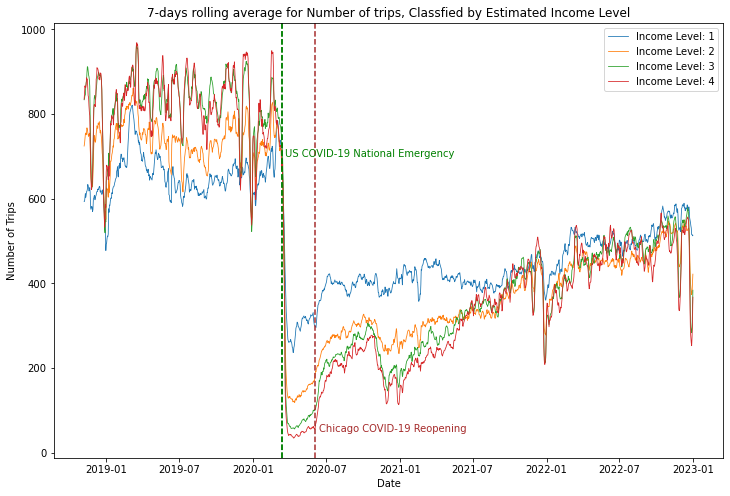

In [43]:
# Create a mean for tip percentage
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i in labels: 
    grouped_mean = df[df['IncomeRank'] == i].groupby([df.date2]).mean()
    grouped_sum = df[df['IncomeRank'] == i].groupby([df.date2]).sum()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    rolling_sum = grouped_sum.rolling(window=7).mean()
    plt.plot(grouped_sum.index, rolling_sum['count'], label = f'Income Level: {i}',linewidth= '0.8')


plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.legend()
plt.title('7-days rolling average for Number of trips, Classfied by Estimated Income Level')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 700, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 50, 'Chicago COVID-19 Reopening', color = 'brown' )

Text(2020-06-13 00:00:00, 1.5, 'Chicago COVID-19 Reopening')

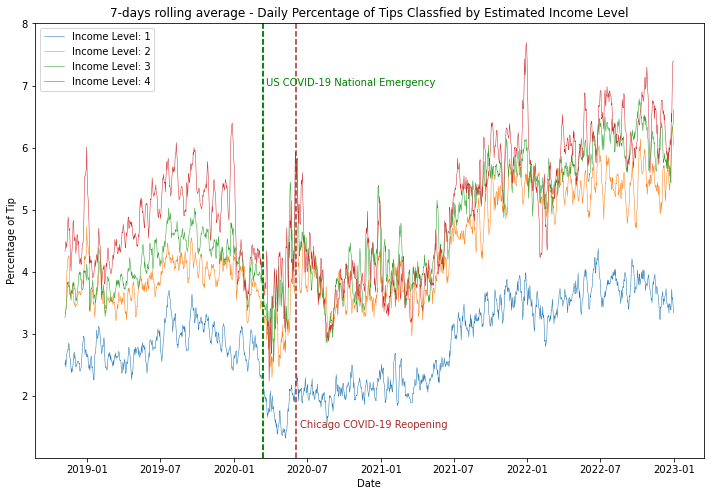

In [44]:
# Create a mean for tip percentage
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i in labels: 
    grouped_mean = df[df['IncomeRank'] == i].groupby([df.date2]).mean()
    grouped_sum = df[df['IncomeRank'] == i].groupby([df.date2]).sum()
    rolling_avg = grouped_mean.rolling(window=7).mean()
    rolling_sum = grouped_sum.rolling(window=7).mean()
    plt.plot(rolling_avg.index, rolling_avg['tipperc'], label = f'Income Level: {i}',linewidth= '0.5')


plt.xlabel('Date')
plt.ylabel('Percentage of Tip')
plt.legend()
plt.title('7-days rolling average - Daily Percentage of Tips Classfied by Estimated Income Level')

plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')

# Some events (to discuss)
# National Emergency
plt.axvline(pd.to_datetime('03/13/2020', format='%m/%d/%Y'), color='g', linestyle='--')
plt.text(pd.to_datetime('03/20/2020', format='%m/%d/%Y'), 7, 'US COVID-19 National Emergency', color = 'g' )

# https://chicago.suntimes.com/coronavirus/2020/5/28/21273554/coronvirus-chicago-reopening-businesses-restaurants-pandemic-rules-lightfoot
plt.axvline(pd.to_datetime('06/3/2020', format='%m/%d/%Y'), color='brown', linestyle='--')
plt.text(pd.to_datetime('06/13/2020', format='%m/%d/%Y'), 1.5, 'Chicago COVID-19 Reopening', color = 'brown' )